# PHYS 434 - Lab 1

## Thomas K. Waters

Import Statements:

In [27]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.integrate import quad

plt.rcParams["figure.figsize"] = (15,10) #Setting future plot sizes

### Generating a normal distribution for visualization

In [52]:
mu = 0
std = 1

data = stats.norm.rvs(loc = 0, scale = 1, size = 100000)

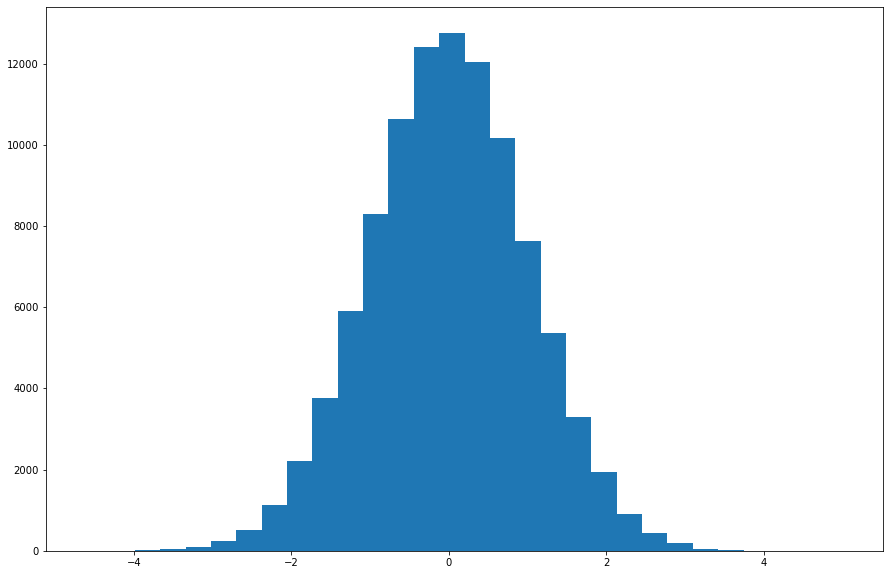

In [53]:
plt.hist(data, bins = 30); # Plots a histogram with 30 bins

### Integrating the normal distribution to find various probabilities

In [119]:
def find_probabilities(x, mu, std):
    
    ''' Calculates probability of drawing values greater than and less than 
        a specified value of x for a given mean (mu) and standard deviation (std)
        and returns the Z score'''
    
    P_less = scipy.stats.norm.cdf(x, mu, std) #Probability of values LESS than x
    P_greater = scipy.stats.norm.sf(x, mu, std) #Probability of values GREATER than x
    
    Zscore = (x-mu)/std
    
    return P_less, P_greater, Zscore

In [112]:
x1 = 1.725
mu = 0
std1 = 1

x2 = 3
std2 = 2

x3 = -2.4
std3 = 1

x4 = 1.23
std4 = 0.725

x5 = 8
std5 = 15

In [113]:
P_less1, P_greater1, Z1 = find_probabilities(x1, mu, std1)
P_less2, P_greater2, Z2 = find_probabilities(x2, mu, std2)
P_less3, P_greater3, Z3 = find_probabilities(x3, mu, std3)
P_less4, P_greater4, Z4 = find_probabilities(x4, mu, std4)
P_less5, P_greater5, Z5 = find_probabilities(x5, mu, std5)

In [114]:
P_less1, P_greater1, Z1

(0.9577362637420476, 0.04226373625795246, 1.725)

In [115]:
P_less2, P_greater2, Z2

(0.9331927987311419, 0.06680720126885807, 1.5)

In [116]:
P_less3, P_greater3, Z3

(0.008197535924596131, 0.9918024640754038, -2.4)

In [117]:
P_less4, P_greater4, Z4

(0.9551092783080097, 0.04489072169199032, 1.696551724137931)

In [118]:
P_less5, P_greater5, Z5

(0.7030985713961488, 0.2969014286038512, 0.5333333333333333)

#### The above values for the probabilities less than the chosen x value and their associated z score agree with the z score table obtained on https://www.ztable.net/

### Determining the standard deviation from probabilities

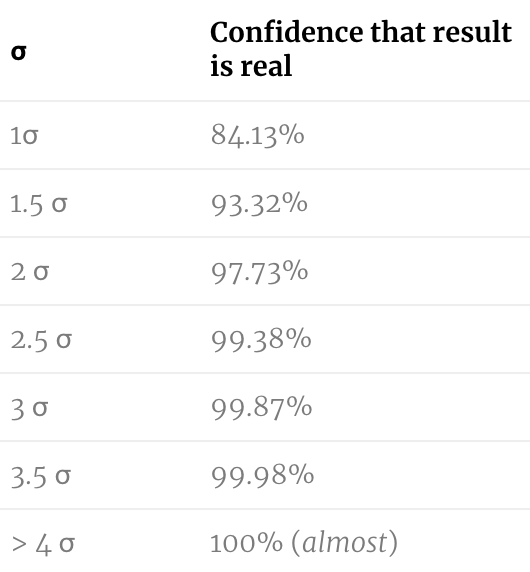

Image from: https://www.zmescience.com/science/what-5-sigma-means-0423423/

In [135]:
standard_sigma1 = stats.norm.ppf(0.8413, mu, std1)
standard_sigma2 = stats.norm.ppf(0.9332, mu, std1)
standard_sigma3 = stats.norm.ppf(0.9773, mu, std1)
standard_sigma4 = stats.norm.ppf(0.9938, mu, std1)
standard_sigma5 = stats.norm.ppf(0.9987, mu, std1)
standard_sigma6 = stats.norm.ppf(0.9998, mu, std1)

In [137]:
standard_sigma1, standard_sigma2, standard_sigma3, standard_sigma4, standard_sigma5, standard_sigma6

(0.9998150936147446,
 1.5000556030177843,
 2.000929388101571,
 2.5005517930490497,
 3.011453758499792,
 3.540083799206175)